## Weight & Biases
Zur Nachverfolgung und Analyse der Model-Performance

### Dataset & Runs
Namen für Datensets und Runs für bessere Nachvollziehbarkeit auf wandb

#### Runs
- **gb-hnf-uc**: Gradient Boosting mit HNF & UsageCluster
- **gb-hnf-cu**: Gradient Boosting mit HNF & Combined Usage


### Gradient Boosting
Imports & Datensatz laden

329
{'test_r2_mean': 0.9391432291338042}
{'test_neg_mean_absolute_percentage_error_mean': -0.17120394032142064}
{'test_neg_root_mean_squared_error_mean': -948.01014876811}
{'test_neg_mean_absolute_error_mean': -476.91412732204094}
{'test_max_error_mean': -4929.550348490856}


,area_total_floor_416,total_expenses,volume_total_416,BETRIEB,HALLEN,BEHERBERGUNG,SCHULEN,BUERO,WOHNEN,ANDERES,OFFENE_BAUTEN,GESUNDHEIT,KULTUS_KULTUR,TECHNIK,AUSSENANLAGEN,IRRELEVANT
180,2247.0,8.847342e+06,7460.000000,0,0,0,0,0,1,0,0,0,0,0,0,0
3,273.0,1.612900e+06,900.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
224,7614.0,1.928500e+07,22743.000000,0,0,0,0,0,1,0,0,0,0,0,0,0
83,11100.0,4.893800e+07,47950.000000,0,0,0,1,0,0,0,0,0,0,0,0,0
123,2170.0,8.098000e+06,7460.000000,0,0,0,0,0,1,0,0,0,0,0,0,0
108,1955.0,6.616000e+06,6799.000000,0,0,0,0,0,1,0,0,0,0,0,0,0
273,3340.0,1.014526e+07,11408.000000,0,0,0,0,1,0,0,0,0,0,0,0,0
25,5395.0,2.510000e+07,14380.000000,0,0,0,0,0,0,0,1,0,0,0,0,0
312,3397.0,1.178300e+07,10200.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
159,12765.0,4.448905e+07,40549.000000,0,0,0,0,0,1,0,0,0,0,0,0,0


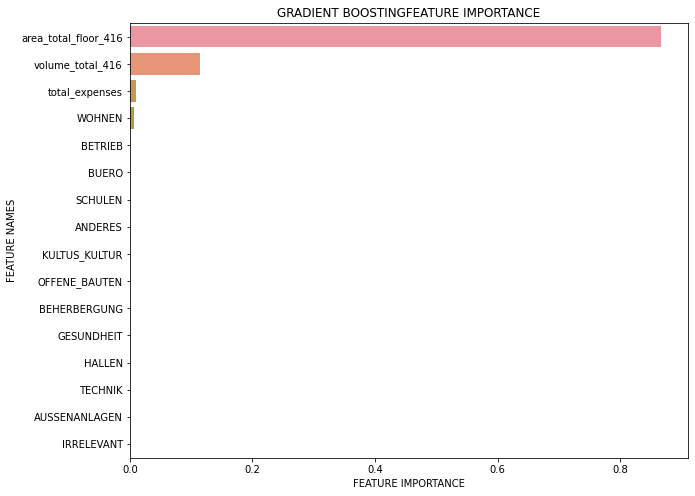

In [1]:
from typing import Final
import wandb
import pandas as pd
from numpy import mean

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

import src.package.consts as c
import src.package.charts as charts
import src.package.importer as im
import src.package.importer_usages as imp_usg
import src.package.ml_helper as ml_helper

pd.set_option('display.max_rows', 500)  # to show all value_counts

# load dataset
df = im.get_extended_dataset('../package/datasets/train_set.csv')
df = imp_usg.extract_usage_details(df)
df = imp_usg.extract_garage_details(df)
df = ml_helper.remove_outliers(df, factor=2.3)
# df = df[~df[c.FIELD_ID].isin([1673,1136])] # Produktions
print(df[c.FIELD_ID].count())

X, y = ml_helper.hnf_dataset_full(df)

# wandb.login()

MODEL_GRADIENT_BOOSTING: Final = 'GradientBoosting'
MODEL_LINEAR_REGRESSION: Final = 'LinearRegression'
current_model = MODEL_GRADIENT_BOOSTING

TAG_TRAIN_SET: Final = 'train-set'
TAG_TEST_SET: Final = 'test-set'

# config
config = {
     'model': current_model,
     'features': ', '.join(X.columns.values),
     'dataset-count': len(X.index),
     'description': 'Impute volume 416 (clustered), Removed outliers (2.3), Drop all, OneHotEncoding, Default Hyperparameter'
}
# wandb.init(project='Metriken Bauwesen', entity='devcore', config=config, tags=[TAG_TRAIN_SET])

# train and evaluate model
regr = GradientBoostingRegressor(random_state=0)
# regr = linear_model.LinearRegression()
scores_map = ml_helper.cross_validation(regr, X, y)

# log result of cross validation to wandb
for key in scores_map.keys():
     if key in {'fit_time', 'score_time'}:
         continue
     scores = scores_map[key]
     # wandb.log({f'{key}_mean': mean(scores)})
     print({f'{key}_mean': mean(scores)})

# use wandb regression eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
regr.fit(X_train, y_train)

# wandb.sklearn.plot_regressor(regr, X_train, X_test, y_train, y_test, model_name=current_model)

charts.plot_feature_importance(regr.feature_importances_, X.columns, 'GRADIENT BOOSTING')
X_train